   customer_id  age        income  family_size  engagement_score  \
0            1   56  20000.000000            1          0.196688   
1            2   69  48663.199407            2          0.237483   
2            3   46  30432.957492            1          0.299898   
3            4   32  60045.088232            2          0.642795   
4            5   60  55498.973691            4          0.600945   

   subscription_status  mainline_spend  
0                    0      838.882801  
1                    0      852.128589  
2                    0      373.167077  
3                    1     1143.126389  
4                    1     1230.006252  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


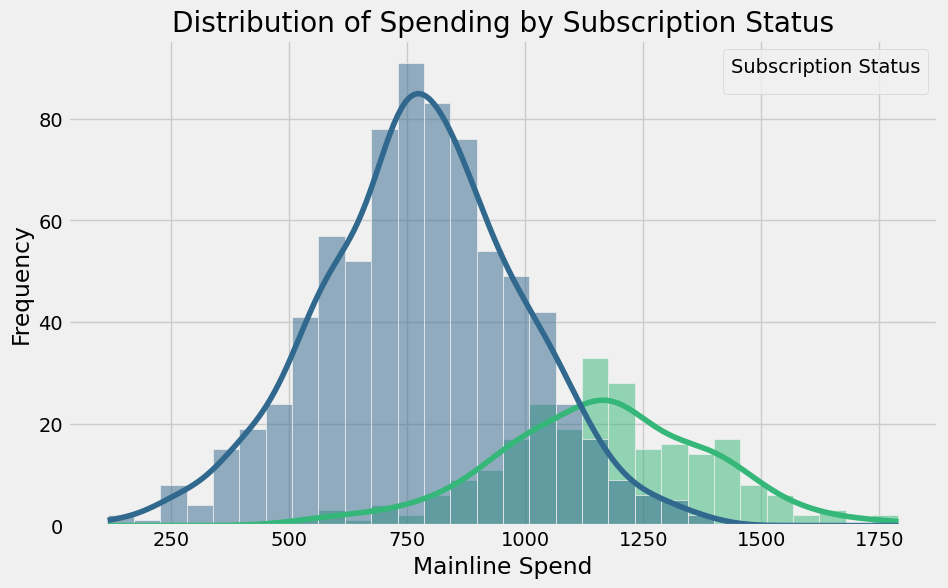

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("synthetic_causal_data.csv")
print(df.head())

df["subscription_status"] = df["subscription_status"].astype(int)  # Convert to integer
df["subscription_status"] = df["subscription_status"].astype("category")  # Convert to categorical

plt.figure(figsize=(10, 6))
sns.histplot(df, x="mainline_spend", bins=30, kde=True, hue="subscription_status", palette="viridis")

plt.title("Distribution of Spending by Subscription Status")
plt.xlabel("Mainline Spend")
plt.ylabel("Frequency")
plt.legend(title="Subscription Status")
plt.show()



plt.show()


In [5]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


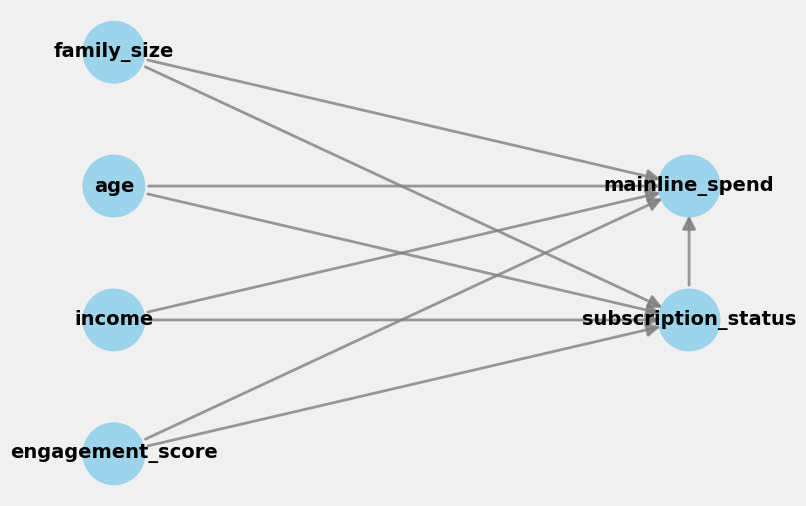

In [7]:
from dowhy import CausalModel

causal_graph = """
digraph {
    age -> subscription_status;
    income -> subscription_status;
    engagement_score -> subscription_status;
    family_size -> subscription_status;

    age -> mainline_spend;
    income -> mainline_spend;
    engagement_score -> mainline_spend;
    family_size -> mainline_spend;
    subscription_status -> mainline_spend;
}
"""

model = CausalModel(
    data=df,
    treatment="subscription_status",
    outcome="mainline_spend",
    graph=causal_graph
)

model.view_model()


In [8]:
estimands = model.identify_effect()
print(estimands)
estimate = model.estimate_effect(
    estimands, method_name="backdoor.propensity_score_matching"
)
print("Estimated Causal Effect:", estimate)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                     
─────────────────────(E[mainline_spend|age,income,engagement_score,family_size])
d[subscriptionₛₜₐₜᵤₛ]                                                           
Estimand assumption 1, Unconfoundedness: If U→{subscription_status} and U→mainline_spend then P(mainline_spend|subscription_status,age,income,engagement_score,family_size,U) = P(mainline_spend|subscription_status,age,income,engagement_score,family_size)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Estimated Causal Effect: *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                   

In [9]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf


df["placebo_outcome"] = np.random.normal(100, 20, len(df))

# Run placebo test regression
placebo_model = smf.ols("placebo_outcome ~ subscription_status + age + income + engagement_score + family_size", data=df)
placebo_results = placebo_model.fit()

# Print summary
print(placebo_results.summary())


                            OLS Regression Results                            
Dep. Variable:        placebo_outcome   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6076
Date:                Fri, 07 Feb 2025   Prob (F-statistic):              0.694
Time:                        07:56:20   Log-Likelihood:                -4460.3
No. Observations:                1000   AIC:                             8933.
Df Residuals:                     994   BIC:                             8962.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [13]:
!pip install econml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


In [16]:
!pip install --upgrade econml


  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [13]:
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import numpy as np

# Ensure the treatment variable is binary (0 or 1)
df["subscription_status"] = df["subscription_status"].astype(int)

# Define machine learning models for outcome and treatment modeling
model_y = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=42)
model_t = Lasso(alpha=0.1)

# Initialize DML model with cross-fitting
dml_model = LinearDML(model_y=model_y, model_t=model_t, cv=5, random_state=42)

# Fit the model
dml_model.fit(
    Y=df["mainline_spend"],
    T=df["subscription_status"],
    X=df[["age", "income", "engagement_score", "family_size"]]
)

# Get the estimated treatment effect
treatment_effect = dml_model.effect(df[["age", "income", "engagement_score", "family_size"]])
print("DML Estimated Effect:", np.mean(treatment_effect))


DML Estimated Effect: 16.268535564897146


In [11]:
from sklearn.utils import fixes
from causalml.inference.meta import BaseXRegressor
from econml.dml import LinearDML

print("All dependencies are working!")


All dependencies are working!
